In [60]:
import pandas as pd
import numpy as np  
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

In [61]:
mid_prices = [100]
days = 1
for t in range(days * 9 * 3600):
    mid_prices.append(mid_prices[-1] + np.random.normal(0, 0.01))
del mid_prices[0]  

In [62]:
spreads = np.random.uniform(0.01, 0.04, size=days * 9 * 3600)
bid_prices = [mid - spread/2 for mid, spread in zip(mid_prices, spreads)]
ask_prices = [mid + spread / 2 for mid, spread in zip(mid_prices, spreads)]

In [63]:
k_base = 60
k_values = np.random.normal(loc=k_base, scale=2, size=3600*days*9)
np.clip(k_values, 30, 90)
max_trades_per_second = 5
lambdas = max_trades_per_second * np.exp(-k_values * spreads)
trade_counts = np.random.poisson(lam=lambdas)

In [64]:
def generate_timestamps(start_date, days, seconds_per_day):
    timestamps = []
    base_date = pd.to_datetime(start_date)

    for d in range(days):
        day_start = base_date + pd.Timedelta(days=d) + pd.Timedelta(hours=8, minutes=0)
        for s in range(seconds_per_day):
            timestamps.append(day_start + pd.Timedelta(seconds=s))

    return timestamps

In [65]:
timestamps = generate_timestamps("2025-01-01", days, 3600*9)

# Create DataFrame
df = pd.DataFrame({
    "timestamp": timestamps,
    "mid_price": mid_prices,
    "bid_price": bid_prices,
    "ask_price": ask_prices,
    "volume": trade_counts
})

In [66]:
df.to_csv("Data/simulated_bond_data.csv", index=False)

Text(0.5, 0, 'Time')

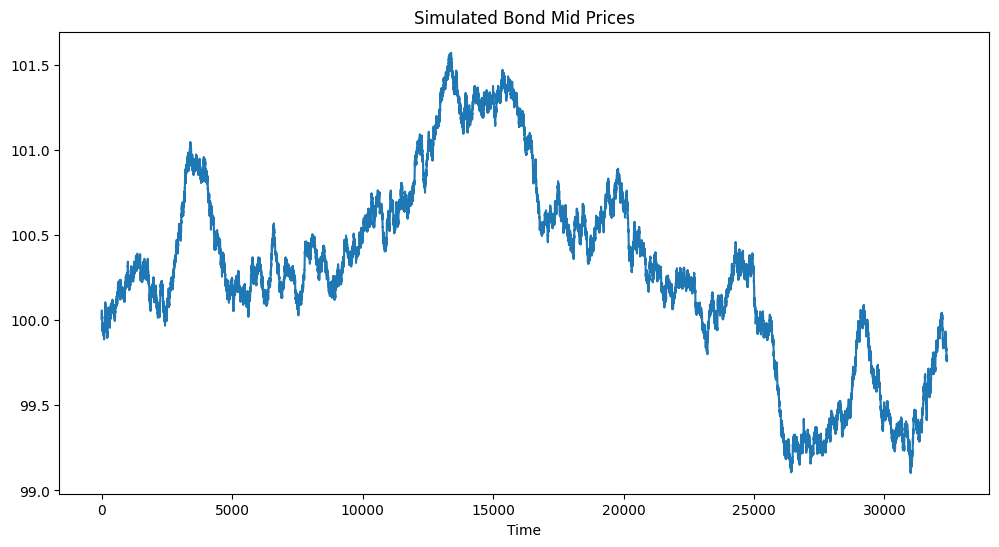

In [67]:
df['mid_price'].plot(figsize=(12, 6), title="Simulated Bond Mid Prices")
plt.xlabel("Time")